In [237]:
#Importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import pairwise_distances

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pandas.tools.plotting import parallel_coordinates

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

from bokeh.io import output_notebook, show
from bokeh.charts import HeatMap, bins, show

# Business and Data Understanding

The business problem is that a predictive model must be produced to help identify at risk fans. At risk fans are fans that are most likely to defect. 

Producing a model that can accurately identify at risk fans is extemeley important in order to intervene in an attempt to retain those fans. 

# Data importing, cleaning, and transforming

In [238]:
# Reading the dataset, viewing the first 5 rows
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [239]:
# Finding out about the dataset
df.info

<bound method DataFrame.info of         FAKEID  Y2defect  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS  \
0     580V74KT         0     0     0     1     1     1       15      8   
1     298S54OK         1     0     0     1     0     1       15      3   
2     268D25AO         1     1     0     0     0     1       15     11   
3     312Q12WV         1     1     0     1     0     1       15      4   
4     420R23VB         0     0     0     1     0     0       15      5   
5     611B52LL         1     0     0     1     0     0       15      2   
6     612W26VA         1     0     1     0     0     0       15      4   
7     594Y59EZ         0     1     1     0     0     1       15      6   
8     610K33YD         1     1     0     0     0     1       25      4   
9     716W84WL         1     0     1     1     0     0       15      3   
10    912U90JS         1     0     0     0     0     1       25      6   
11    154U02JL         0     1     1     0     0     0       15      5   
12    

In [240]:
# Replacing blank values with NaN 
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [241]:
# Checking to see how many null values are in each column
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [242]:
# Dropping CHILD, COMP, SPORT, GNDR, OWNHOME, and HOMEVAL columns. Viewing first 5 rows.
df = df.drop('CHILD', axis =1)
df = df.drop('COMP', axis = 1)
df = df.drop('SPORT',axis = 1)
df = df.drop('GNDR', axis = 1)
df = df.drop('OWNHOME', axis = 1)
df = df.drop('HOMEVAL', axis = 1)
df.head(5)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,77
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,53
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,50
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,60
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,65


In [243]:
# Creating a Total Games Column
# Dropping single game columns
df['GAMES'] = df['Y1G5']+ df['Y1G4'] + df['Y1G3'] + df['Y1G2'] + df['Y1G1']
df = df.drop('Y1G1', axis =1)
df = df.drop('Y1G2', axis =1)
df = df.drop('Y1G3', axis =1)
df = df.drop('Y1G4', axis =1)
df = df.drop('Y1G5', axis =1)

df.head(5)

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,GAMES
0,580V74KT,0,15,8,1,94.0,4.0,77,3
1,298S54OK,1,15,3,1,NaN,NaN,53,2
2,268D25AO,1,15,11,1,67.0,2.0,50,2
3,312Q12WV,1,15,4,0,62.0,4.0,60,3
4,420R23VB,0,15,5,0,89.0,4.0,65,1


In [244]:
# Converting the AGE and INCOME columns from object data types to numeric. 
# Checking the data types after the conversion
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 9 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
PCTMARR     9216 non-null int64
GAMES       9216 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 648.1+ KB


In [245]:
# Filling null values with 0
df=df.fillna({'AGE':'0'})
df=df.fillna({'INCOME':'0'})

In [246]:
# Figuring out how many null values are left in the dataset 
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
PCTMARR     0
GAMES       0
dtype: int64

# Data Visualization

YEARS
2     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
6     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
7     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
8     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
9     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
10    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
11    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
12    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
13    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
14    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
15    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
16    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
18    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
19    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
21    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
23    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
24    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

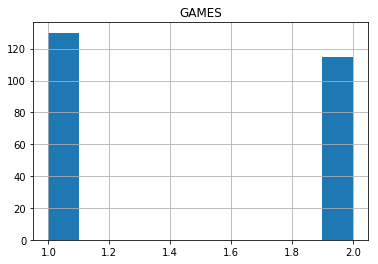

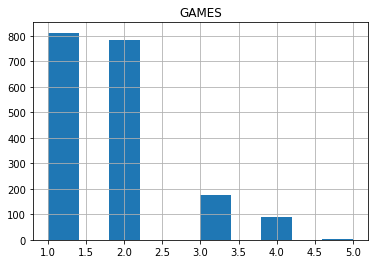

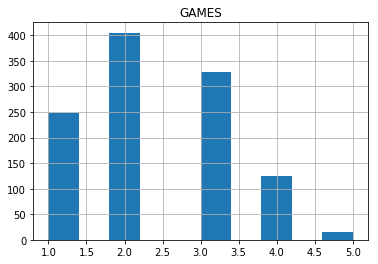

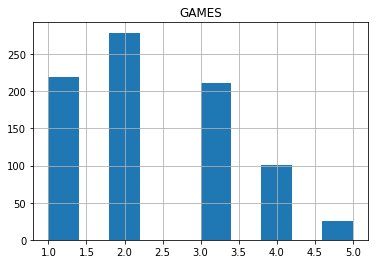

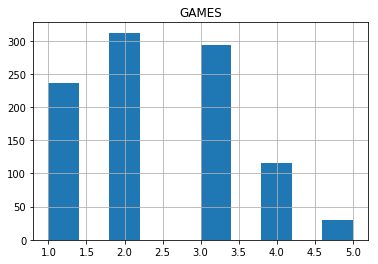

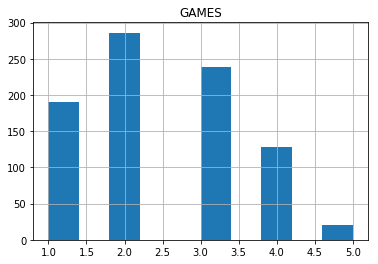

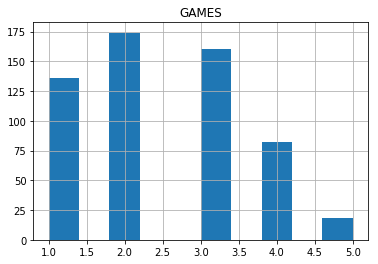

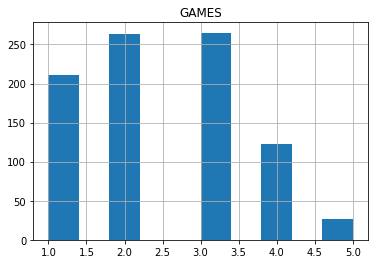

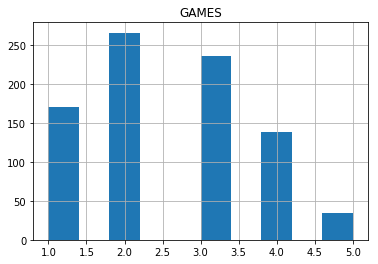

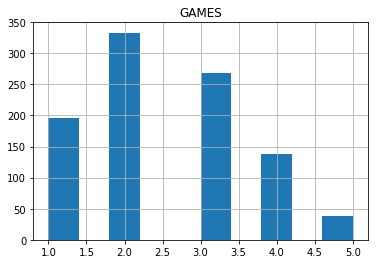

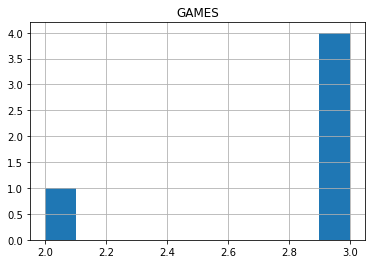

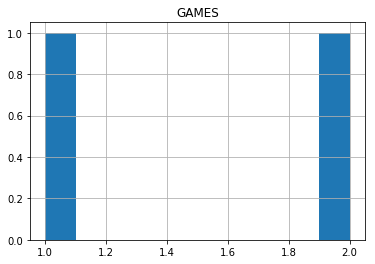

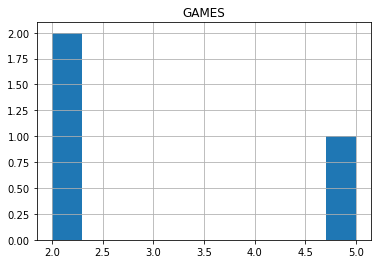

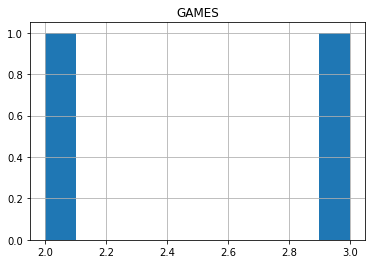

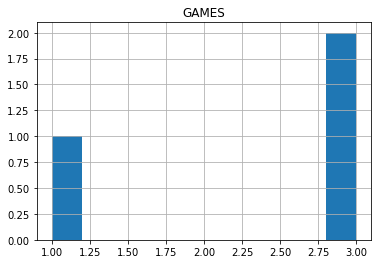

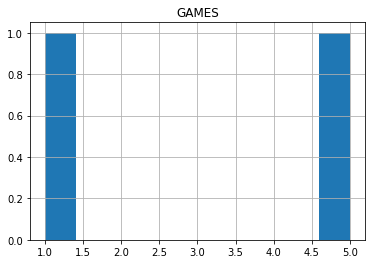

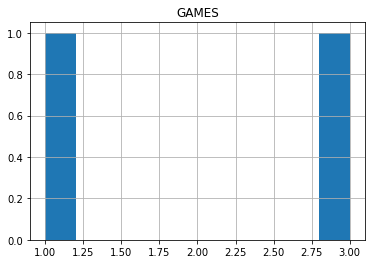

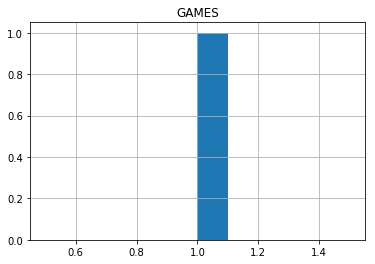

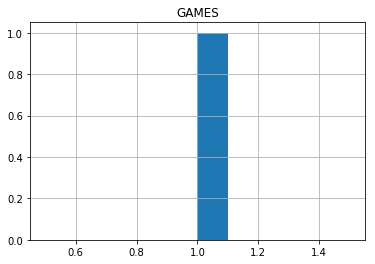

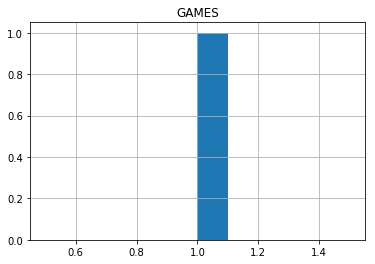

In [247]:
# Histogram of the relationship between Years and Games
df.groupby('YEARS').hist('GAMES')

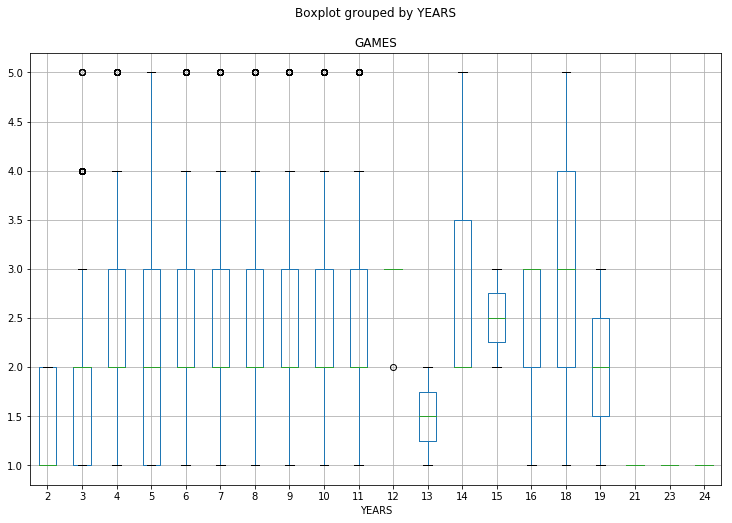

In [248]:
# Boxplot of the relationship between Games and Years
df.boxplot('GAMES', by='YEARS', figsize=(12, 8))

In [249]:
# Pivot Table of Years
df.groupby('YEARS').mean()

,Y2defect,Y1price,BACKER,PCTMARR,GAMES
YEARS,,,,,
2,0.987755,18.489796,0.061224,55.730612,1.469388
3,0.640021,17.851395,0.176502,57.983906,1.762339
4,0.483066,20.588235,0.250446,57.939394,2.336007
5,0.453892,20.610778,0.344910,57.619162,2.322156
6,0.407295,21.306991,0.480243,58.734549,2.382979
7,0.427083,21.903935,0.554398,58.681713,2.425926
8,0.438596,21.157895,0.635088,58.796491,2.424561
9,0.445321,20.924464,0.727170,58.793687,2.423901
10,0.447991,19.834515,0.849882,58.494090,2.530733


# EDA and Statistical (Hypothesis) Testing

In [250]:
# Correlation Chart
df.corr()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,GAMES
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023869,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.008032,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.023691,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.032558,0.220321
PCTMARR,-0.023869,0.008032,0.023691,0.032558,1.000000,0.021239
GAMES,-0.164720,0.022259,0.217106,0.220321,0.021239,1.000000


In [251]:
#Importing statsmodels and ols
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [252]:
# Run regression model 
runs_reg_model1 = ols('Y2defect~BACKER+YEARS+Y1price+INCOME+AGE+GAMES+PCTMARR',df)
runs_reg1 = runs_reg_model1.fit()
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:               Y2defect   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.612
Date:                Thu, 03 May 2018   Prob (F-statistic):           8.70e-75
Time:                        18:46:14   Log-Likelihood:                -6388.3
No. Observations:                9216   AIC:                         1.296e+04
Df Residuals:                    9122   BIC:                         1.363e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4783      0.488      0.980

Since the P-Value for YEARS, BACKER, Y1price and GAMES is all less than .05 we can conclude that those columns are significant to Y2defect. 

# Model Building/Deployment

In [253]:
# Creating X and Y variables for my model
y = df['Y2defect']
X = df[['BACKER', 'YEARS', 'Y1price','INCOME','AGE','GAMES','PCTMARR',]]

In [254]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [255]:
# Fitting the classifiers
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Model Selection 

In [256]:
# Finding out the performance of the decision tree model
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.557323688969
[[776 587]
 [637 765]]
             precision    recall  f1-score   support

          0       0.55      0.57      0.56      1363
          1       0.57      0.55      0.56      1402

avg / total       0.56      0.56      0.56      2765

0.557490713926


In [257]:
# Importing Random Forest and testing performance
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.98404947916666663

# Model Deployment and Entry Data Preparation

In [258]:
# Reading the dataset
# Viewing the first 5 rows
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [259]:
# Replacing blank values with NaN 
df2 = df.replace(r'\s+', np.nan, regex=True)
df2.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,GAMES
0,580V74KT,0,15,8,1,94,4,77,3
1,298S54OK,1,15,3,1,0,0,53,2
2,268D25AO,1,15,11,1,67,2,50,2
3,312Q12WV,1,15,4,0,62,4,60,3
4,420R23VB,0,15,5,0,89,4,65,1


In [260]:
# Renaming the columns Y2price to Y1pice and Y3defect to Y2defect for consistency
# Viewing the first two rows
df2 = df2.rename(columns={'Y2price': 'Y1price'})
df2 = df2.rename(columns={'Y3defect': 'Y2defect'})
df2.head(2)

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,GAMES
0,580V74KT,0,15,8,1,94,4,77,3
1,298S54OK,1,15,3,1,0,0,53,2


In [261]:
# Changing AGE and INCOME to numeric. 
df2['AGE'] = pd.to_numeric(df2['AGE'], errors='coerce')
df2['INCOME'] = pd.to_numeric(df2['INCOME'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 9 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
PCTMARR     9216 non-null int64
GAMES       9216 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 648.1+ KB


In [262]:
# Filling null values with 0
df2=df.fillna({'AGE':'0'})
df2=df.fillna({'INCOME':'0'})
# Figuring out how many null values there are in the dataset
df2.isnull().sum()

FAKEID      0
Y2defect    0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
PCTMARR     0
GAMES       0
dtype: int64

In [263]:
# Creating 'Validation' variable with only the columns that were used in the first model
# Displaying Validation data types and entries
validation = df2[['BACKER', 'YEARS','Y1price','INCOME','AGE','GAMES','PCTMARR',]]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 7 columns):
BACKER     9216 non-null int64
YEARS      9216 non-null int64
Y1price    9216 non-null int64
INCOME     9216 non-null object
AGE        9216 non-null object
GAMES      9216 non-null int64
PCTMARR    9216 non-null int64
dtypes: int64(5), object(2)
memory usage: 504.1+ KB


In [264]:
# Creating 'fakeid' variable 
# Viewing first 5 rows of fakeid
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580V74KT
1,298S54OK
2,268D25AO
3,312Q12WV
4,420R23VB


In [265]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

# Storytelling and Analysis

A model with the colunns or variables 'BACKER','YEARS','Y1price','INCOME','AGE','GAMES', 'PCTMARR', and 'Y2Defect' should be used to accurately identify who will defect or not. Each one of these variables plays a significant role in whether or not the customer will renew season tickets. 

The Decision Tree model resulted in 56 percent accuracy and the Random Forest model resulted in a 98 percent accuracy. 
The most influential variables are: 'BACKERS', 'YEARS', 'Y1price' and 'GAMES'. Adding in 'INCOME', 'AGE', and 'PCTMARR' result in a higher model accuracy when running the Random Forest model. 

The season ticket holders most likely to renew are ticket holders that are members of the backers club, have been ticket holders for multiple years, attended multiple games, and ticket holders who pay less money for season tickets. 

The people that should be targeted should be ticket holders with higher ticket prices, ticket holders that didn't make it to many games, ticket holders not in the backers club, and ticket holders that haven't had season tickets for multiple years. 